# Notebook: 01_BTC_basic_analysis
# Week 1: Download and analyze Bitcoin data

In [1]:
# Imports
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import date

# Create today’s date in the right format
today = date.today().strftime("%Y-%m-%d") 

# Download Bitcoin data (latest data included)
btc = yf.download("BTC-USD", start="2020-01-01", end=today, auto_adjust=True)  

[*********************100%***********************]  1 of 1 completed


In [2]:
# Quick data overview

print("Data shape:", btc.shape)
print("Columns:", btc.columns)
print("First 5 rows:")
btc.head()

Data shape: (2082, 5)
Columns: MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])
First 5 rows:


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095


In [3]:
# Compute daily returns, cumulative returns, rolling volatility (30-day)

btc['Daily Return'] = btc['Close'].pct_change()

btc['Cumulative Return'] = (1 + btc['Daily Return']).cumprod() - 1

btc['Volatility_30d'] = btc['Daily Return'].rolling(window=30).std()

In [4]:
# Basic statistics

print("Mean daily return:", btc['Daily Return'].mean())

print("Standard deviation of daily returns:", btc['Daily Return'].std())

Mean daily return: 0.001870471776181737
Standard deviation of daily returns: 0.03238561501410265


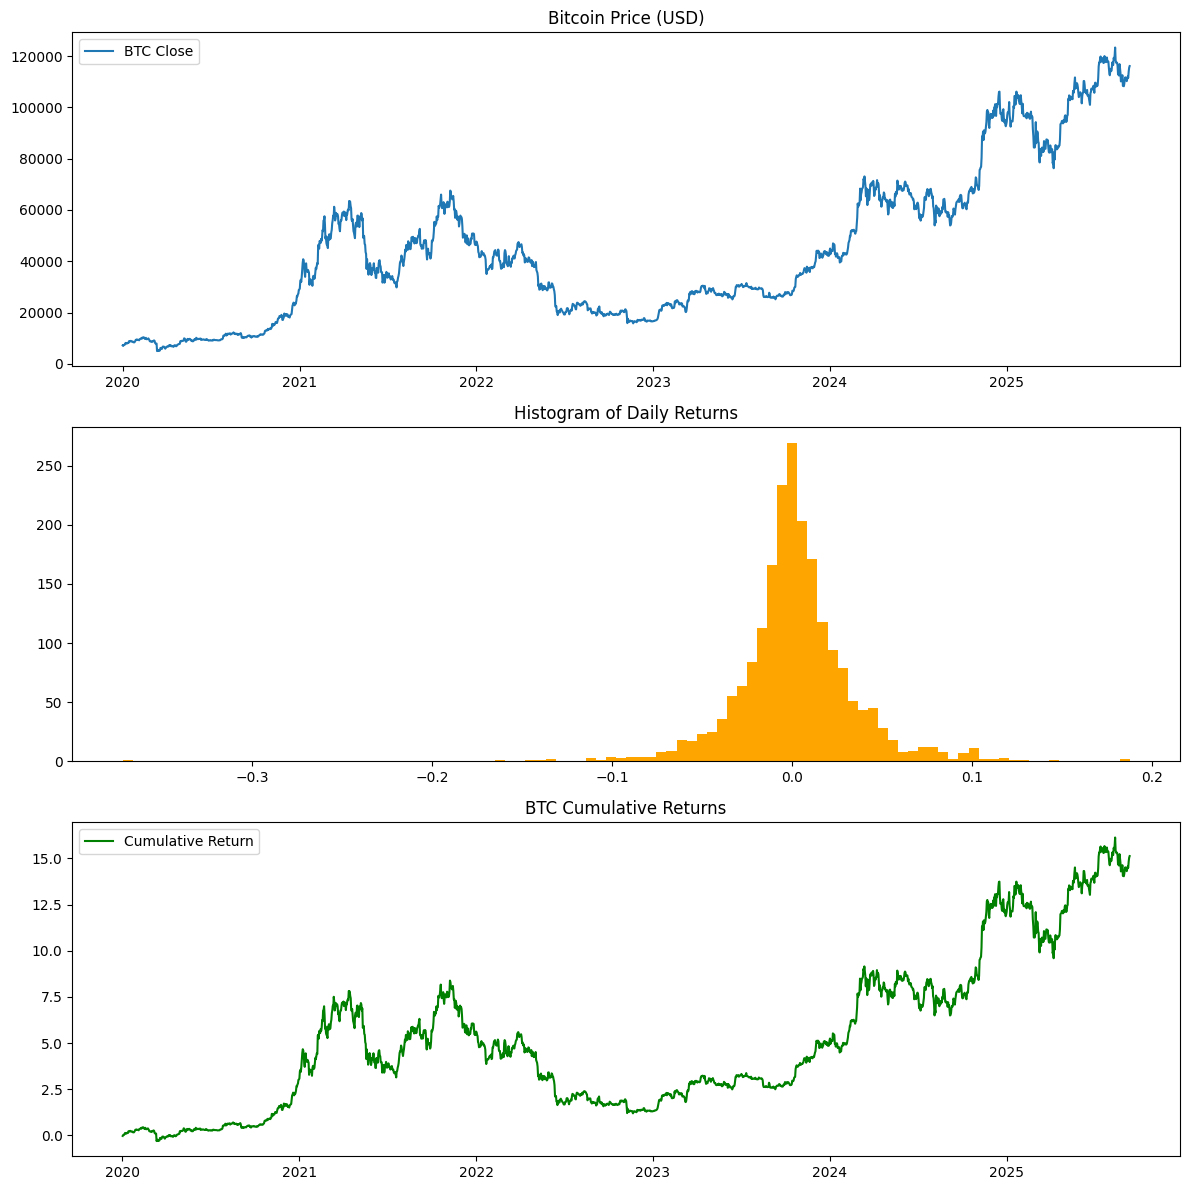

In [5]:
# Plot charts

fig, axs = plt.subplots(3, 1, figsize=(12, 12))

# BTC price
axs[0].plot(btc['Close'], label='BTC Close')
axs[0].set_title("Bitcoin Price (USD)")
axs[0].legend()

# Daily returns histogram
axs[1].hist(btc['Daily Return'].dropna(), bins=100, color='orange')
axs[1].set_title("Histogram of Daily Returns")

# Cumulative returns
axs[2].plot(btc['Cumulative Return'], label='Cumulative Return', color='green')
axs[2].set_title("BTC Cumulative Returns")
axs[2].legend()

plt.tight_layout()
plt.show()

In [6]:
# Save processed data

os.makedirs("../data", exist_ok=True)

# Use today's date in YYYY-MM-DD format for clarity
today = date.today().strftime("%Y-%m-%d")
btc.to_csv(f"../data/btc_{today}.csv", index=True)  # Date stays as index
print(f"Saved dataset to ../data/btc_{today}.csv")

Saved dataset to ../data/btc_2025-09-13.csv
